> Name: Sushant Pokharel 


# Using Long Short-Term Memory (LSTM) Model to Predict Stock Prices

### Terminologes used: 

---

- **Epoch**  =>  Passing the input data through the network and optimizing the weights once, is one epoch. <br/>


- **Batch**  =>  The training data is divided into batches. Theoretically one can feed all the training data into a network at once, but practically it is limited to the computer’s memory. <br/>


- **Error function**  =>  E(y, t), where y is the output of the network and t is some target value. Minimizing the error function is equal to training the network. Mean squared error, MSE = p.square(np.subtract(Y_true,Y_pred)).mean() <br/>


- **LSTM network**  =>  A recurrent network structure which is capable of learning long-term dependencies. <br/>


- **Min-Max Scaling**  =>  A normalization method. all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively. <br/>



## About Dataset
---
### Company: Nepal Telecom 


### Duration: From year 2010 to 2020


> Source: https://www.kaggle.com/dklbbk/nepaltelecom-stock-price

<br/>

### In sequence prediction problems such as Stock Price prediction, LSTM are powerful as they have ability to store past information in memory. This feature is very applicable in this project because previous prices are crutial to predict future price.

### We will start by importing required dependencies: Numpy, Pandas, Matplotlib and MinMax Scaler. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

### We will now store dataset into the variable df. 

### date_parser is used to convert string columns into array of date-time instances

In [2]:
df = pd.read_csv('ntcprice.csv', date_parser = True)

In [3]:
df.head(10)

,SN,Date,No. of Transaction,Max Price,Min Price,Closing Price,Traded Shares,Total Amount,Prev. Closing,Difference(Rs),% Change
0,1,2020-01-01,37,623.0,612.0,619.0,6310,3886900,623.0,-4.0,-0.64
1,2,2019-12-31,39,649.0,620.0,623.0,3034,1896758,662.0,-39.0,-5.89
2,3,2019-12-30,134,662.0,655.0,662.0,28830,19005838,659.0,3.0,0.46
3,4,2019-12-29,47,664.0,658.0,659.0,6455,4254337,657.0,2.0,0.30
4,5,2019-12-26,45,668.0,654.0,657.0,3815,2506070,657.0,0.0,0.00
5,6,2019-12-25,48,660.0,650.0,657.0,7225,4735546,653.0,4.0,0.61
6,7,2019-12-24,166,670.0,650.0,653.0,15459,10112842,659.0,-6.0,-0.91
7,8,2019-12-23,38,659.0,637.0,659.0,5000,3210900,641.0,18.0,2.81
8,9,2019-12-22,20,643.0,635.0,641.0,2262,1443946,636.0,5.0,0.79
9,10,2019-12-19,31,652.0,632.0,636.0,1808,1152456,643.0,-7.0,-1.09


In [4]:
df.tail(10)

,SN,Date,No. of Transaction,Max Price,Min Price,Closing Price,Traded Shares,Total Amount,Prev. Closing,Difference(Rs),% Change
2190,2191,2010-04-27,11,448.0,433.0,445.0,3030,1335440,445.0,0.0,0.00
2191,2192,2010-04-26,3,448.0,441.0,445.0,1200,534700,455.0,-10.0,-2.20
2192,2193,2010-04-25,10,455.0,440.0,455.0,2310,1035190,440.0,15.0,3.41
2193,2194,2010-04-22,5,440.0,433.0,440.0,1250,542850,443.0,-3.0,-0.68
2194,2195,2010-04-21,10,444.0,438.0,443.0,2000,882540,444.0,-1.0,-0.23
2195,2196,2010-04-20,7,445.0,440.0,444.0,3870,1708480,441.0,3.0,0.68
2196,2197,2010-04-19,3,445.0,441.0,441.0,400,177500,442.0,-1.0,-0.23
2197,2198,2010-04-15,13,455.0,422.0,455.0,3300,1464600,414.0,41.0,9.90
2198,2199,2010-04-15,13,455.0,422.0,455.0,3300,1464600,414.0,41.0,9.90
2199,2200,2010-04-15,13,455.0,422.0,455.0,3300,1464600,414.0,41.0,9.90


In [5]:
df.shape

(2200, 11)

## Splitting the data into training and testing sets

### Using this code we will be able to train our model on data form year 2010 to 1st of jan 2019
### We will test the model on data from 1st of jan 2019 to 1st of jan 2020

In [6]:
data_training = df[df['Date']<'2019-01-01'].copy()
data_test = df[df['Date']>='2019-01-01'].copy()

In [7]:
data_training.head()

,SN,Date,No. of Transaction,Max Price,Min Price,Closing Price,Traded Shares,Total Amount,Prev. Closing,Difference(Rs),% Change
243,244,2018-12-31,15,743.0,731.0,734.0,3110,2286790,743.0,-9.0,-1.21
244,245,2018-12-30,67,797.0,743.0,743.0,18455,13756150,797.0,-54.0,-6.78
245,246,2018-12-27,135,804.0,790.0,797.0,23618,18746584,792.0,5.0,0.63
246,247,2018-12-26,56,792.0,785.0,792.0,13328,10515076,785.0,7.0,0.89
247,248,2018-12-25,31,790.0,780.0,785.0,7800,6108265,790.0,-5.0,-0.63


In [8]:
data_test.head()

,SN,Date,No. of Transaction,Max Price,Min Price,Closing Price,Traded Shares,Total Amount,Prev. Closing,Difference(Rs),% Change
0,1,2020-01-01,37,623.0,612.0,619.0,6310,3886900,623.0,-4.0,-0.64
1,2,2019-12-31,39,649.0,620.0,623.0,3034,1896758,662.0,-39.0,-5.89
2,3,2019-12-30,134,662.0,655.0,662.0,28830,19005838,659.0,3.0,0.46
3,4,2019-12-29,47,664.0,658.0,659.0,6455,4254337,657.0,2.0,0.30
4,5,2019-12-26,45,668.0,654.0,657.0,3815,2506070,657.0,0.0,0.00


### After splitting, the column 'Date' is not required. We will drop the column. We specify axis = 1 to command the function to look through the columns for 'Date'

In [9]:
df_train = data_training.drop(['Date'], axis = 1)


### Exploring the Training set

In [10]:
df_train.head()

,SN,No. of Transaction,Max Price,Min Price,Closing Price,Traded Shares,Total Amount,Prev. Closing,Difference(Rs),% Change
243,244,15,743.0,731.0,734.0,3110,2286790,743.0,-9.0,-1.21
244,245,67,797.0,743.0,743.0,18455,13756150,797.0,-54.0,-6.78
245,246,135,804.0,790.0,797.0,23618,18746584,792.0,5.0,0.63
246,247,56,792.0,785.0,792.0,13328,10515076,785.0,7.0,0.89
247,248,31,790.0,780.0,785.0,7800,6108265,790.0,-5.0,-0.63


In [11]:
df_train.shape

(1957, 10)

In [12]:
data_test.shape

(243, 11)

In [14]:
scaler = MinMaxScaler()
df_train1 = scaler.fit_transform(df_train)
df_train1

array([[0.00000000e+00, 3.18181818e-02, 6.36521739e-01, ...,
        6.56794425e-01, 5.00000000e-01, 4.38938939e-01],
       [5.11247444e-04, 1.50000000e-01, 7.30434783e-01, ...,
        7.50871080e-01, 9.82142857e-02, 1.60160160e-01],
       [1.02249489e-03, 3.04545455e-01, 7.42608696e-01, ...,
        7.42160279e-01, 6.25000000e-01, 5.31031031e-01],
       ...,
       [9.98977505e-01, 2.72727273e-02, 1.35652174e-01, ...,
        8.36236934e-02, 9.46428571e-01, 9.94994995e-01],
       [9.99488753e-01, 2.72727273e-02, 1.35652174e-01, ...,
        8.36236934e-02, 9.46428571e-01, 9.94994995e-01],
       [1.00000000e+00, 2.72727273e-02, 1.35652174e-01, ...,
        8.36236934e-02, 9.46428571e-01, 9.94994995e-01]])

### We will train the data in smaller bits of 60 days. We want to train the model with data of 60 days at a time 

### The loop will run the code until the training shape is 0



### the i is set to iterate from 60 to 1957 (current length)

### It starts from i - 60 and goes until its equal to 60. In the next step, the same process if executed on y_train. 

### The parameters in y_train (i, 0) states the price on the 60th day

### At last, we store the data into numpy arrays

In [15]:
X_train = []
y_train = []

for i in range(60, df_train1.shape[0]):
    X_train.append(df_train1[i-60:i])
    y_train.append(df_train1[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)


### We can see the shape of X_train. 

### It has 1897 rows 
### Divided into a list of 60  
### each list has 10 columns i.e. attributes 

In [16]:
X_train.shape


(1897, 60, 10)

# Building LSTM

### importing Dependencies: Sequential, Dense, LSTM and Dropout

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

### We are using Sequential model because it performs best when each layer will be provided with one input tensor and will have one output tensor

In [18]:
regressor =Sequential()


In [19]:
X_train.shape


(1897, 60, 10)

### The Activation function Rectified Linear Activation Function (RELU) is used bacause it is able to detect non-linear trends. 
### It also outputs the input values directly if its positive, or zero in other case. Due to these features RELU is widely used in these type of models.

### The first LSTM layer will have 60 units. i.e. memory units of each neuron.

### return_sequences = True returns the full sequence in the output i.e. with hidden sequence

### input_shape is set to (60, 10). This depends on out data. The dimention of our data is 60 by 10

### Dropout layer prevents the model from overfitting. It limits model to certain dataset and ignores neurons while training randomly. 

### The final layer is Dense layer. It states that the neurons from that layer is completely connected to the previous layers. We have set the units value 1 because we are predicting single value. 

In [20]:
regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (60, 10)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

## Model Summary

In [21]:
regressor.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 60)            17040     
_________________________________________________________________
dropout (Dropout)            (None, 60, 60)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

### We are using 'adam' optimizer which is best for deep learning models. The loss function will be 'mean squared error'. 

## Fitting the model
### We will use 100 epoch to train the model. It can be understood as no of iterations of training the model. 
### We now divide the data into batch sizes. It indicates the number of training samples used for each iteration through the neural network. 

In [22]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
60/60 [==============================] - 8s 82ms/step - loss: 0.0412
Epoch 2/100
60/60 [==============================] - 5s 80ms/step - loss: 0.0035
Epoch 3/100
60/60 [==============================] - 5s 81ms/step - loss: 0.0037
Epoch 4/100
60/60 [==============================] - 5s 80ms/step - loss: 0.0042
Epoch 5/100
60/60 [==============================] - 6s 101ms/step - loss: 0.0031
Epoch 6/100
60/60 [==============================] - 6s 101ms/step - loss: 0.0026
Epoch 7/100
60/60 [==============================] - 6s 101ms/step - loss: 0.0026
Epoch 8/100
60/60 [==============================] - 6s 100ms/step - loss: 0.0025
Epoch 9/100
60/60 [==============================] - 6s 101ms/step - loss: 0.0024
Epoch 10/100
60/60 [==============================] - 6s 100ms/step - loss: 0.0018
Epoch 11/100
60/60 [==============================] - 6s 101ms/step - loss: 0.0018
Epoch 12/100
60/60 [==============================] - 6s 104ms/step - loss: 0.0019
Epoch 13/100
60/6

# preparing test dataset

In [24]:
data_test.head()


,SN,Date,No. of Transaction,Max Price,Min Price,Closing Price,Traded Shares,Total Amount,Prev. Closing,Difference(Rs),% Change
0,1,2020-01-01,37,623.0,612.0,619.0,6310,3886900,623.0,-4.0,-0.64
1,2,2019-12-31,39,649.0,620.0,623.0,3034,1896758,662.0,-39.0,-5.89
2,3,2019-12-30,134,662.0,655.0,662.0,28830,19005838,659.0,3.0,0.46
3,4,2019-12-29,47,664.0,658.0,659.0,6455,4254337,657.0,2.0,0.30
4,5,2019-12-26,45,668.0,654.0,657.0,3815,2506070,657.0,0.0,0.00


### We are predicting the stock price in terms of the previous 60 days. Using .tail(60), we are able to retrieve that.

In [25]:
past_60_days = data_training.tail(60)


### We will now append test data and ignore the index. 
### We do not need the Date column in the test set as well. So we will drop it

In [26]:
df = past_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date'], axis = 1)
df.head()

,SN,No. of Transaction,Max Price,Min Price,Closing Price,Traded Shares,Total Amount,Prev. Closing,Difference(Rs),% Change
0,2141,3,458.0,451.0,458.0,600,273400,460.0,-2.0,-0.43
1,2142,2,460.0,451.0,460.0,400,181300,458.0,2.0,0.44
2,2143,2,458.0,458.0,458.0,360,164880,456.0,2.0,0.44
3,2144,2,456.0,456.0,456.0,1000,456000,456.0,0.0,0.00
4,2145,3,456.0,450.0,456.0,700,315800,450.0,6.0,1.33


### Shape of test set

In [27]:
df.shape

(303, 10)

In [28]:
inputs = scaler.transform(df)
inputs

array([[ 9.69836401e-01,  4.54545455e-03,  1.40869565e-01, ...,
         1.63763066e-01,  5.62500000e-01,  4.77977978e-01],
       [ 9.70347648e-01,  2.27272727e-03,  1.44347826e-01, ...,
         1.60278746e-01,  5.98214286e-01,  5.21521522e-01],
       [ 9.70858896e-01,  2.27272727e-03,  1.40869565e-01, ...,
         1.56794425e-01,  5.98214286e-01,  5.21521522e-01],
       ...,
       [-1.53374233e-03,  4.54545455e-02,  6.31304348e-01, ...,
         6.34146341e-01,  5.89285714e-01,  5.06506507e-01],
       [-1.02249489e-03,  1.59090909e-02,  6.36521739e-01, ...,
         6.41114983e-01,  5.44642857e-01,  4.72472472e-01],
       [-5.11247444e-04,  1.59090909e-02,  6.45217391e-01, ...,
         6.41114983e-01,  5.80357143e-01,  4.99499499e-01]])

### Similar to the training set, we are didiving the data into chunks of 60 days and storing it to X_test and y_test

In [29]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((243, 60, 10), (243,))

## Predicting the price

In [30]:
y_pred = regressor.predict(X_test)


### Scaling.scale_ returns the scaling factor

In [31]:
scaler.scale_


array([5.11247444e-04, 2.27272727e-03, 1.73913043e-03, 1.77619893e-03,
       1.06382979e-03, 7.33084085e-06, 9.70454710e-09, 1.74216028e-03,
       8.92857143e-03, 5.00500501e-02])

### We inverse the scale value and multiply it to y_pred and y_test. 

In [32]:
scale = 1/5.11247444e-04
scale

1955.999999092416

### The actual values are stored in the y_test and predicted values in the y_pred value. 

In [33]:
y_pred = y_pred*scale
y_test = y_test*scale

## Visualizing Output

### We can see from the graph, the model is decently accurate. The Red line represents the Real Stock Prices, whereas the blue line represents Predicted prices.

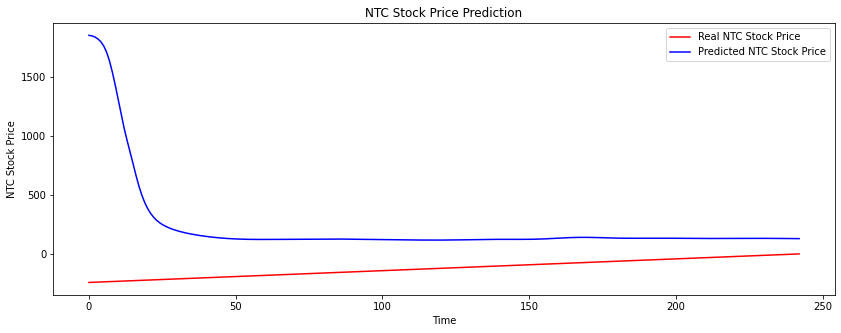

In [34]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real NTC Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted NTC Stock Price')
plt.title('NTC Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('NTC Stock Price')
plt.legend()
plt.show()

### The stocks seem to grow on an average rate over the years. This is a very common behaviour. In most cases the average yearly growth is between 6% to 12%. 

### There is plenty of room for tuning and improvent for this model to get more precise results.

### Resources: 

- **Understanding LSTM: a tutorial into Long Short-Term Memory** by Ralf C. Staudemeyer & Eric Rothstein Morris
- **On stock return prediction with LSTM networks** by Magnus Hansson
- Analytics Vidhya
- KD nuggets
- Medium (risha-shah.medium.com)
